# Analisis exploratorio del dataset

En el presente notebook analizaremos el dataset Wood Surface Defects deHuggingFace el cual utilizaremos luego en el modelo. El analisis comprende:

- Número total de imágenes
- Distribucción de clases.
- Tamaño de imágenes
- Visualización de muestras por clase
- Verificar si existen imágenes sin labels

## Dateset completo descargado desde HugginFace

### Carga

In [2]:
from collections import Counter
from datasets import load_dataset

datase_full = load_dataset("iluvvatar/wood_surface_defects")["train"]

# Contar todas las etiquetas en 'objects' (que es una lista de dicts por imagen)
all_labels = []

for example in datase_full:
    for obj in example['objects']:
        all_labels.append(obj['label'])

# Contar ocurrencias por clase
label_counts = Counter(all_labels)

# Mostrar resultado ordenado
for label, count in label_counts.most_common():
    print(f"{label}: {count}")

Live_Knot: 21224
Dead_Knot: 11985
resin: 3455
knot_with_crack: 2276
Crack: 2169
Marrow: 1181
Quartzity: 1075
Knot_missing: 503
Blue_Stain: 96
overgrown: 10


### Cantidad de etiquetas totales del dataset

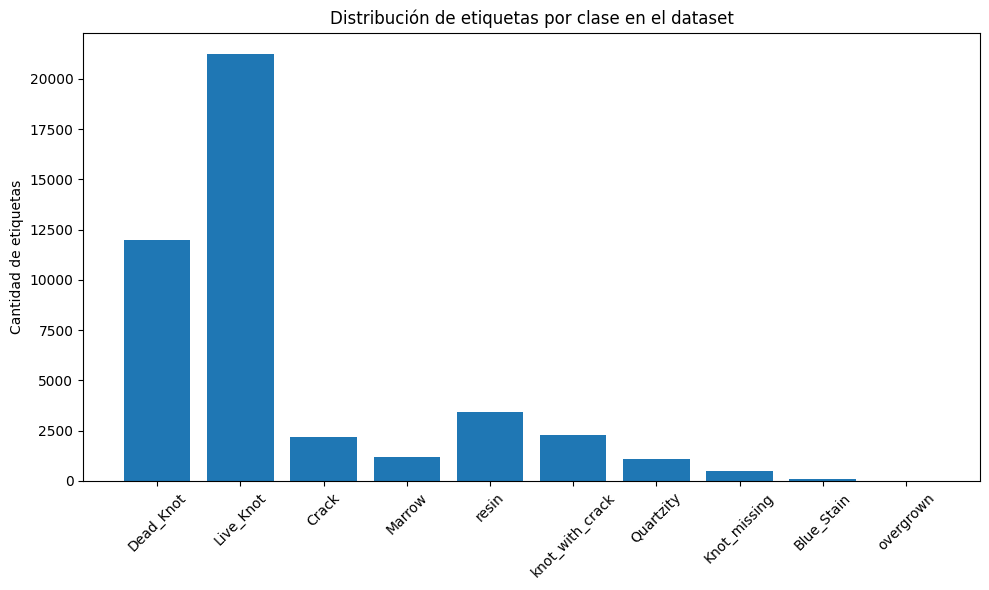

In [3]:
import matplotlib.pyplot as plt

# Datos
labels = list(label_counts.keys())
counts = list(label_counts.values())

# Gráfico
plt.figure(figsize=(10, 6))
plt.bar(labels, counts)
plt.xticks(rotation=45)
plt.ylabel("Cantidad de etiquetas")
plt.title("Distribución de etiquetas por clase en el dataset")
plt.tight_layout()
plt.show()

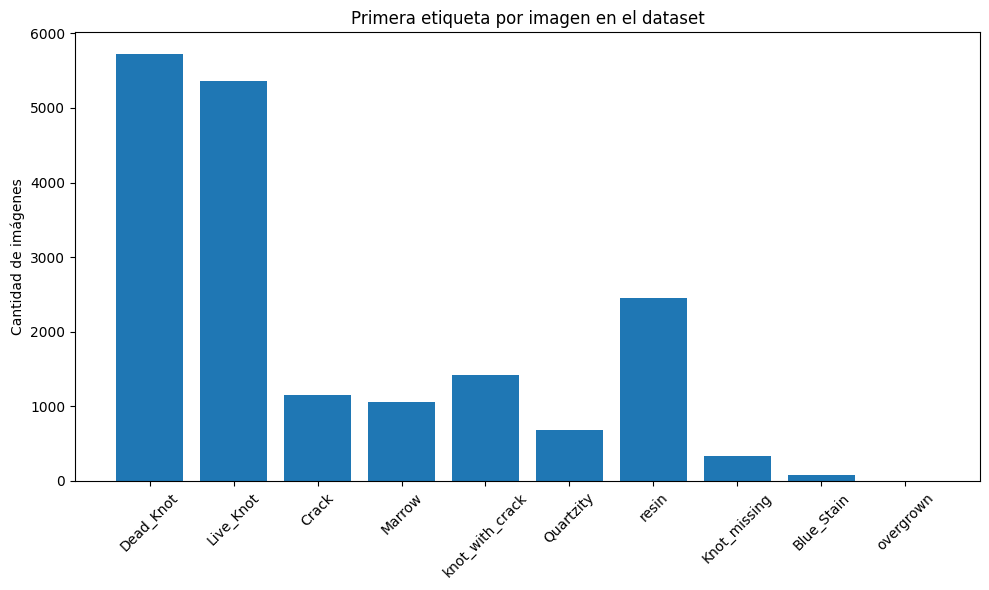

In [7]:
from collections import Counter
from datasets import load_dataset
import matplotlib.pyplot as plt

# Cargar dataset
dataset_full = load_dataset("iluvvatar/wood_surface_defects")["train"]

# Obtener solo la primera etiqueta de cada imagen
first_labels = []

for example in dataset_full:
    if example["objects"]:  # Verificamos que haya al menos una etiqueta
        first_labels.append(example["objects"][0]["label"])

# Contar ocurrencias
label_counts = Counter(first_labels)

# Graficar
labels = list(label_counts.keys())
counts = list(label_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(labels, counts)
plt.xticks(rotation=45)
plt.ylabel("Cantidad de imágenes")
plt.title("Primera etiqueta por imagen en el dataset")
plt.tight_layout()
plt.show()

## Dataset utilizado para el modelo

In [1]:
%run ./init_path.py

c:\Users\juana\anaconda3\envs\VPC3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Saving the dataset (1/1 shards): 100%|██████████| 64/64 [00:00<00:00, 3355.28 examples/s]


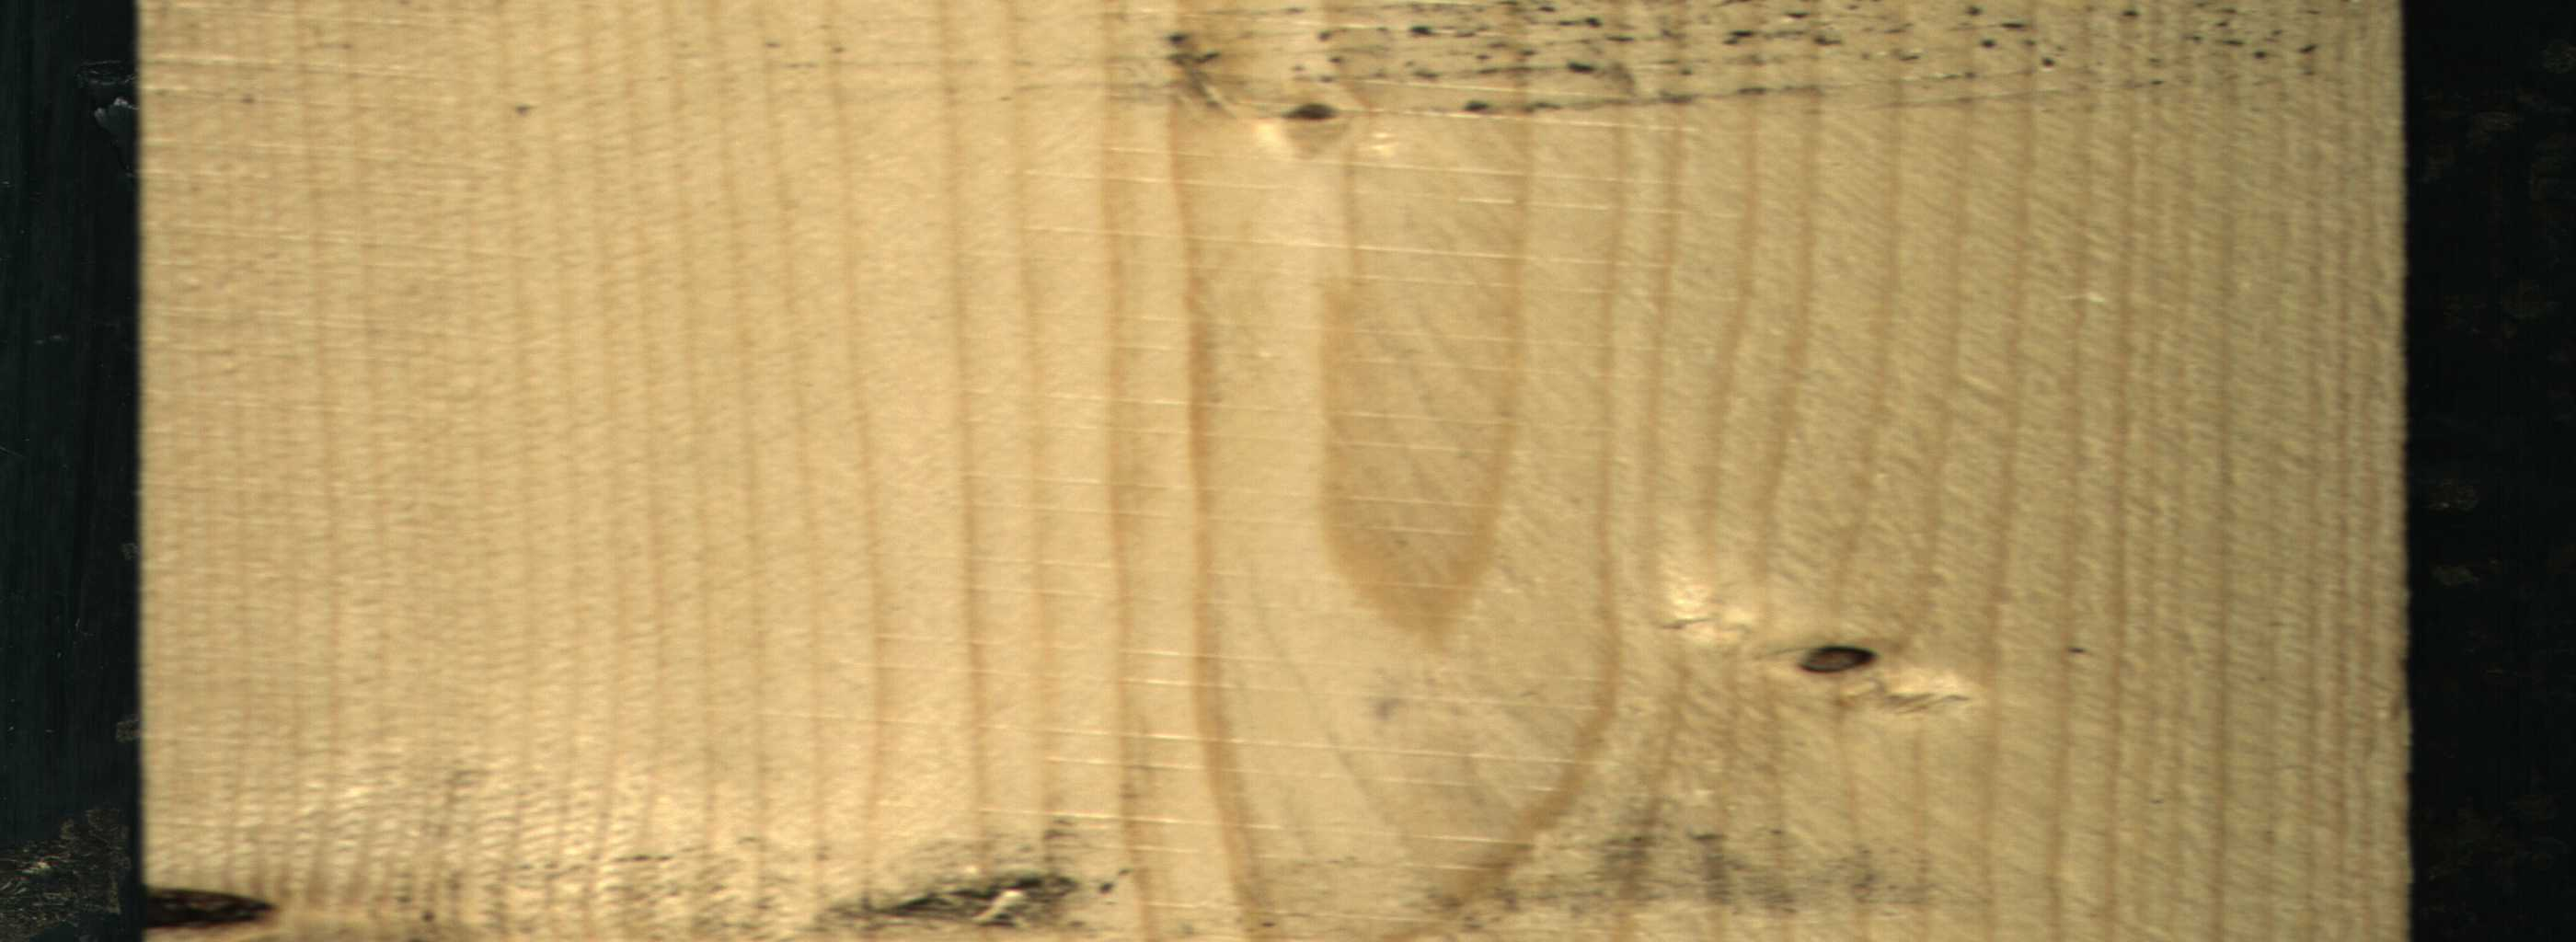

In [2]:
from src.utils import get_or_prepare_dataset, assign_main_label_for_eda
from src.plots import plot_class_distribution

dataset = get_or_prepare_dataset()
dataset['train'][2]['image']

La anterior sample muestra una imágen del dataset que contiene lo que se denomina nudo vivo y parece estar integrado en la madera. Esta imágen es ```2800x1024``` por lo que se realizó un processing usando el processor establecido para este proyecto ```google/vit-base-patch16-224``` el cual redimensionará las imágenes a ```224x224```

Map: 100%|██████████| 64/64 [00:00<00:00, 1754.50 examples/s]


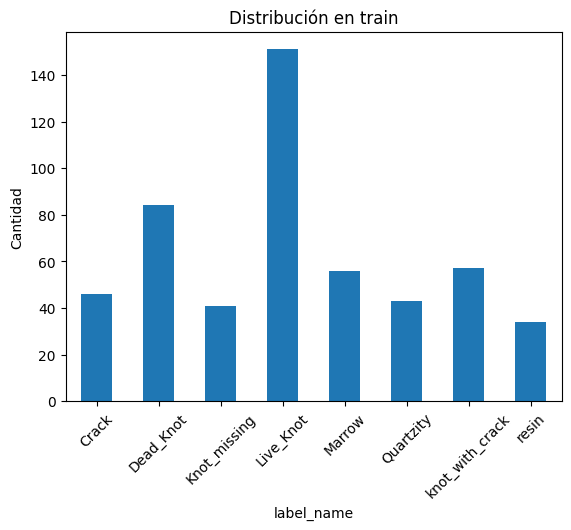

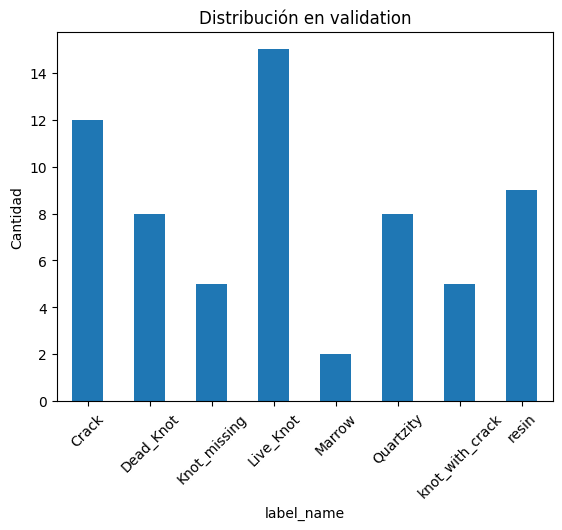

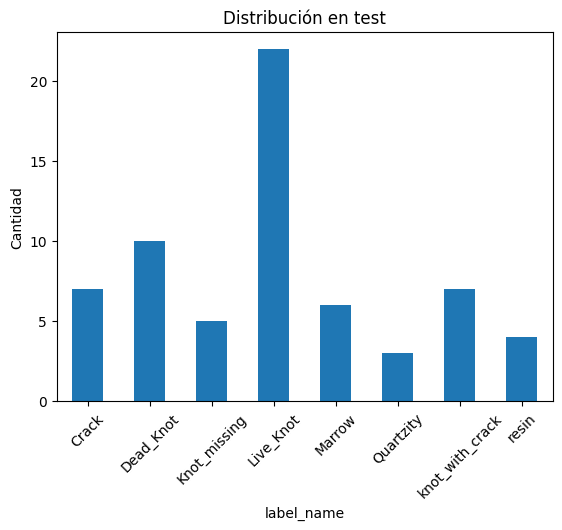

In [3]:
dataset = dataset.map(assign_main_label_for_eda)

for split_name in dataset:
    plot_class_distribution(split_name, dataset[split_name])